In [152]:
#importando as bibliotecas pandas e yfinance que é uma biblioteca do Yahoo Finance onde os dados são extraídos. 
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

#### Construindo um estudo de caso usando uma carteira de ações comparada ao IBOV

In [5]:
#criando uma lista de ações para serem trabalhadas como se fossem uma carteira de investimentos
carteira = ['PETR4','VALE3','MGLU3','WEGE3','BPAC11','RADL3','CIEL3','BBAS3', 'ITUB4', 'BBDC4']

In [4]:
#criando uma função que irá receber uma lista de ativos e irá importar seus dados do yfinance

def captacao_dados(ativos, inicio, fim):
    df_dados = pd.DataFrame()
    
    for i in ativos:
        ticker = str(i) + '.SA'
        df_dados[i] = yf.download(ticker, start= inicio, end= fim)['Adj Close']
    
    return df_dados

In [7]:
cotacoes = captacao_dados(carteira, '2020-01-01', '2023-05-01')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [130]:
cotacoes.head() #conferindo se a importação dos dados ocorreu corretamente

,PETR4,VALE3,MGLU3,WEGE3,BPAC11,RADL3,CIEL3,BBAS3,ITUB4,BBDC4
Date,,,,,,,,,,
2020-01-02,12.977712,39.578941,12.029735,16.858400,17.714905,21.428072,7.007978,43.551605,33.883350,24.469002
2020-01-03,12.872029,39.287544,11.922435,16.643126,17.766312,20.950356,6.918028,43.478748,33.526958,24.481382
2020-01-06,13.024211,39.054432,11.932189,16.686180,17.740612,20.537958,6.746305,42.903999,33.028027,24.044104
2020-01-07,12.973484,39.338539,11.898048,16.815344,17.811386,20.256182,6.550048,42.580193,32.261784,23.626392
2020-01-08,12.893165,39.345825,12.263843,16.179087,17.653540,20.526762,6.402855,42.191628,31.736134,23.260902


In [131]:
#verificando e excluindo possiveis dados nulos que foram importados junto com dados íntegros
cotacoes.isnull().sum()

cotacoes_limpa = cotacoes.dropna()

##### Agora montando um estudo de caso, supondo que você possui 10.000 reais para aplicar nesses 10 papeis, e que você comprou no começo de 2020 esses 10.000 reais divididos em todos esses papeis, vamos verificar como que foi o desempenho dessa carteira em relação ao IBOV(indice do IBovespa)

In [132]:
#verificando a quantidade de papeis que foram comprados de cada ativo com os 10k.
primeira_linha = cotacoes_limpa.iloc[0]

qtd_comprada = round(1000 / primeira_linha,0) #utilizo a função round para arredondar a quantidade de papeis comprado de cada ativo
qtd_comprada

PETR4      77.0
VALE3      25.0
MGLU3      83.0
WEGE3      59.0
BPAC11     56.0
RADL3      47.0
CIEL3     143.0
BBAS3      23.0
ITUB4      30.0
BBDC4      41.0
Name: 2020-01-02 00:00:00, dtype: float64

In [133]:
#Verificando o valor inicial da carteira após a compra dos ativos, calculando assim o patrimônio líquido em ações

# aqui é pego o Data frame com as cotações dos ativos ao longo do tempo até a data de 2023-05-01 multiplicando com o número de ativos 
# comprados com os 10.000 reais, isso irá retornar o valor(em reais) que tenho aplicado de cada papel no data frame
# note que na primeira linha todos os papeis terão aproximadamente 1.000 reais aplicados nele, pois, corresponde a data que foi realizada a 
# aplicação de capital nos ativos. 
pl = cotacoes_limpa * qtd_comprada 

round(pl.head(),0) #exibindo os dados com uma escala de 2 digitos após o ponto

,PETR4,VALE3,MGLU3,WEGE3,BPAC11,RADL3,CIEL3,BBAS3,ITUB4,BBDC4
Date,,,,,,,,,,
2020-01-02,999.0,989.0,998.0,995.0,992.0,1007.0,1002.0,1002.0,1017.0,1003.0
2020-01-03,991.0,982.0,990.0,982.0,995.0,985.0,989.0,1000.0,1006.0,1004.0
2020-01-06,1003.0,976.0,990.0,984.0,993.0,965.0,965.0,987.0,991.0,986.0
2020-01-07,999.0,983.0,988.0,992.0,997.0,952.0,937.0,979.0,968.0,969.0
2020-01-08,993.0,984.0,1018.0,955.0,989.0,965.0,916.0,970.0,952.0,954.0


In [134]:
# Realizando uma simples verificação pegando as ultimas 8 linhas do data frame PL para verificar a situação atual(2023) dos investimentos em cada papel
round(pl.tail(8),2)

,PETR4,VALE3,MGLU3,WEGE3,BPAC11,RADL3,CIEL3,BBAS3,ITUB4,BBDC4
Date,,,,,,,,,,
2023-04-18,1877.08,1963.50,293.82,2316.93,1295.84,1158.40,704.08,1003.03,777.67,558.46
2023-04-19,1816.77,1906.25,269.75,2307.49,1256.08,1136.75,670.55,991.30,765.38,548.23
2023-04-20,1829.11,1866.50,273.90,2374.75,1274.00,1158.85,683.96,1000.73,767.48,553.14
2023-04-24,1864.06,1799.00,281.37,2380.65,1256.08,1175.09,682.62,998.66,760.58,548.64
2023-04-25,1856.52,1750.00,272.24,2391.86,1271.20,1174.55,679.94,989.46,767.48,560.92
2023-04-26,1833.22,1756.75,258.13,2366.49,1254.40,1188.11,692.01,981.41,759.68,552.73
2023-04-27,1788.67,1794.00,265.60,2380.65,1296.40,1184.94,705.42,982.56,773.17,563.38
2023-04-28,1824.90,1810.00,277.22,2426.08,1311.52,1187.65,732.24,985.78,777.07,567.06


In [135]:
# aqui será adicionada uma nova coluna no data frame pl(patrimonio liquido) que irá mostrar a soma total aplicado em cada data presente no data frame
# isso irá dar a noção de quanto está valendo a carteira de ações em cada Data presente no df. 
pl['Valor Total Carteira'] = pl.iloc[:].sum(axis=1)
pl.head()

,PETR4,VALE3,MGLU3,WEGE3,BPAC11,RADL3,CIEL3,BBAS3,ITUB4,BBDC4,Valor Total Carteira
Date,,,,,,,,,,,
2020-01-02,999.283799,989.473534,998.467973,994.645620,992.034668,1007.119383,1002.140917,1001.686920,1016.500511,1003.229073,10004.582397
2020-01-03,991.146256,982.188606,989.562089,981.944407,994.913452,984.666710,989.277987,1000.011211,1005.808754,1003.736677,9923.256149
2020-01-06,1002.864242,976.360798,990.371686,984.484627,993.474274,965.284033,964.721682,986.791985,990.840797,985.808249,9841.002371
2020-01-07,998.958271,983.463478,987.538017,992.105288,997.437622,952.040541,936.656914,979.344429,967.853508,968.682087,9764.080155
2020-01-08,992.773677,983.645630,1017.898934,954.566114,988.598221,964.757814,915.608322,970.407433,952.084007,953.696999,9694.037151


In [136]:
#verificando ao final da data estipulada de investimento quanto ficou o valor da carteira de ações.
round(pl.tail(),2)

,PETR4,VALE3,MGLU3,WEGE3,BPAC11,RADL3,CIEL3,BBAS3,ITUB4,BBDC4,Valor Total Carteira
Date,,,,,,,,,,,
2023-04-24,1864.06,1799.00,281.37,2380.65,1256.08,1175.09,682.62,998.66,760.58,548.64,11746.75
2023-04-25,1856.52,1750.00,272.24,2391.86,1271.20,1174.55,679.94,989.46,767.48,560.92,11714.16
2023-04-26,1833.22,1756.75,258.13,2366.49,1254.40,1188.11,692.01,981.41,759.68,552.73,11642.93
2023-04-27,1788.67,1794.00,265.60,2380.65,1296.40,1184.94,705.42,982.56,773.17,563.38,11734.80
2023-04-28,1824.90,1810.00,277.22,2426.08,1311.52,1187.65,732.24,985.78,777.07,567.06,11899.53


##### Realizando a comparação do desempenho financeiro da carteira estipulada em relação ao indice do Ibov

In [137]:
#realizando a importação dos dados do ibov usando a mesma data usada para o investimento da carteira
dados_ibov = yf.download('^BVSP', start='2020-01-01', end='2023-05-01')

[*********************100%***********************]  1 of 1 completed


In [138]:
#renomeando a coluna de preço de fechamento e aplicando a alteração no data frame dados_ibov
dados_ibov.rename(columns={'Adj Close': 'IBOV'}, inplace=True)

In [139]:
# excluindo diversas colunas que sejam diferentes da coluna IBOV renomeada anteriormente, aqui estou realizando
# a exclusão das colunas utilizando seu numero de indice

dados_ibov = dados_ibov.drop( dados_ibov.columns[[0,1,2,3,5]], axis=1)
dados_ibov.head(10)

,IBOV
Date,
2020-01-02,118573.0
2020-01-03,117707.0
2020-01-06,116878.0
2020-01-07,116662.0
2020-01-08,116247.0
2020-01-09,115947.0
2020-01-10,115503.0
2020-01-13,117325.0
2020-01-14,117632.0


In [140]:
#convertendo as data para o formato de date time
dados_ibov.index = pd.to_datetime(dados_ibov.index)
type(dados_ibov.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [141]:
#agora irei juntar os 2 data frames para poder comparar os dados do IBOV em relação aos dados da carteira de ações

#o parâmetro how serve para realizar uma ação de inner(juntar) o que há de comum entre os 2, que no caso é a Date apresentado no On
df_comparacao = pd.merge(dados_ibov, pl, how='inner', on='Date') 

In [142]:
df_comparacao.head(10)

,IBOV,PETR4,VALE3,MGLU3,WEGE3,BPAC11,RADL3,CIEL3,BBAS3,ITUB4,BBDC4,Valor Total Carteira
Date,,,,,,,,,,,,
2020-01-02,118573.0,999.283799,989.473534,998.467973,994.645620,992.034668,1007.119383,1002.140917,1001.686920,1016.500511,1003.229073,10004.582397
2020-01-03,117707.0,991.146256,982.188606,989.562089,981.944407,994.913452,984.666710,989.277987,1000.011211,1005.808754,1003.736677,9923.256149
2020-01-06,116878.0,1002.864242,976.360798,990.371686,984.484627,993.474274,965.284033,964.721682,986.791985,990.840797,985.808249,9841.002371
2020-01-07,116662.0,998.958271,983.463478,987.538017,992.105288,997.437622,952.040541,936.656914,979.344429,967.853508,968.682087,9764.080155
2020-01-08,116247.0,992.773677,983.645630,1017.898934,954.566114,988.598221,964.757814,915.608322,970.407433,952.084007,953.696999,9694.037151
2020-01-09,115947.0,989.518836,970.714855,1054.129667,940.453730,995.326920,993.788038,859.479128,950.671814,933.105927,938.444384,9625.633298
2020-01-10,115503.0,985.287264,971.807671,1048.462251,959.646667,1009.311966,963.003454,865.325815,928.329147,924.819946,921.318300,9577.312482
2020-01-13,117325.0,987.240066,1007.139492,1097.646932,968.678274,1011.950851,985.543980,868.834005,938.755760,937.115765,931.219210,9734.124334
2020-01-14,117632.0,976.498885,1013.331699,1092.991511,987.871325,992.688248,1000.278454,875.850248,933.728546,937.115765,930.148712,9740.503393


##### Agora será necessário aplicar uma normalização de valores, pois, os valores do Ibov são bem maiores em relação aos da carteira, para isso temos que aplicar a "normalização" para deixar todos os valores em um mesmo patamar estatístico e poder visualizar uma comparação íntegra e correta baseada em porcentagens  

In [146]:
df_comparacao_normalizado = df_comparacao / df_comparacao.iloc[0]
df_comparacao_normalizado.head(5)

,IBOV,PETR4,VALE3,MGLU3,WEGE3,BPAC11,RADL3,CIEL3,BBAS3,ITUB4,BBDC4,Valor Total Carteira
Date,,,,,,,,,,,,
2020-01-02,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2020-01-03,0.992696,0.991857,0.992638,0.991080,0.987230,1.002902,0.977706,0.987165,0.998327,0.989482,1.000506,0.991871
2020-01-06,0.985705,1.003583,0.986748,0.991891,0.989784,1.001451,0.958460,0.962661,0.985130,0.974757,0.982635,0.983649
2020-01-07,0.983883,0.999674,0.993926,0.989053,0.997446,1.005446,0.945311,0.934656,0.977695,0.952143,0.965564,0.975961
2020-01-08,0.980383,0.993485,0.994110,1.019461,0.959705,0.996536,0.957938,0.913652,0.968773,0.936629,0.950627,0.968960


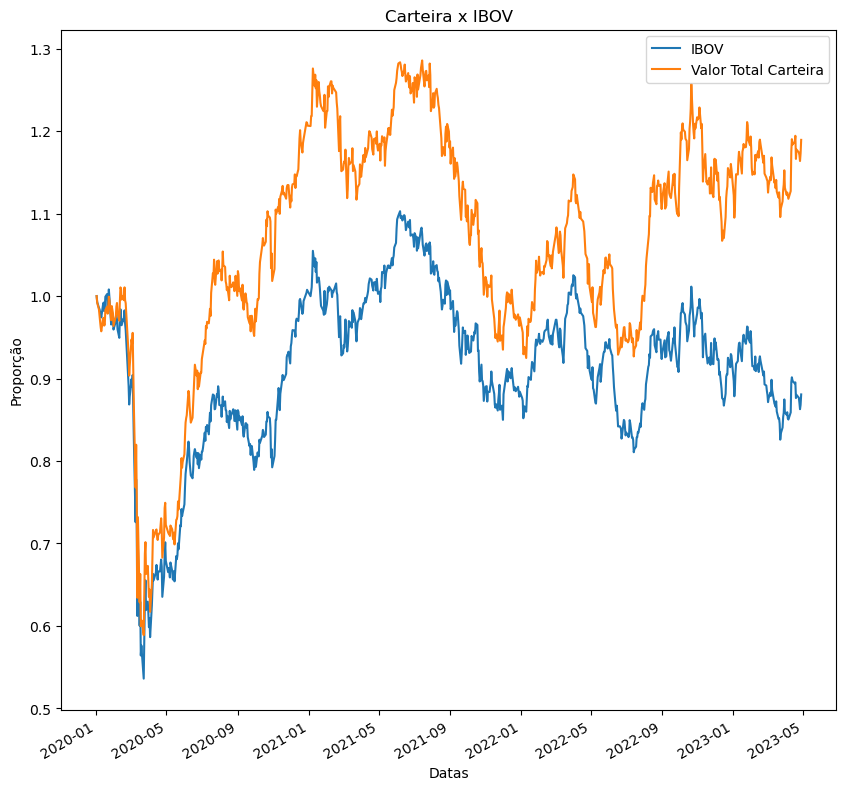

In [155]:
#Agora para verificar graficamente o desempenho da carteira de ações simulada em relação a todo o indice do IBOV basta plotar um gráfico
# pegando somente as informações do IBOV e da coluna Valor Total Carteira
 
df_comparacao_normalizado[['IBOV', 'Valor Total Carteira']].plot(figsize = (10,10))
plt.title('Carteira x IBOV', fontsize = 12)
plt.xlabel('Datas')
plt.ylabel('Proporção')
plt.show()

#será possível verificar que a carteira definida aleatóriamente bateu ou seja foi melhor que o indice geral de ações do IBOV durante 
#quase todo o tempo utilizado como métrica de comparação. 